In [ ]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from torch.autograd import Variable
from torchvision import datasets


In [ ]:
# df=pd.read_csv('/content/mnist_test.csv')

In [ ]:
# df.head()

In [ ]:
# !ls /content/mnist_test.csv

In [ ]:
# !head /content/mnist_test.csv

In [ ]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 83963178.50it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 73998591.22it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 72108136.76it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 1657144.12it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [ ]:
print(train_data.targets.size())

torch.Size([60000])


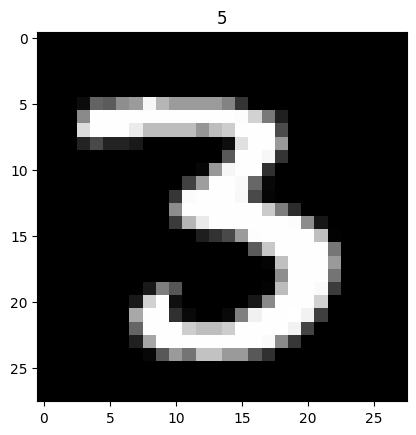

In [ ]:
plt.imshow(train_data.data[12], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

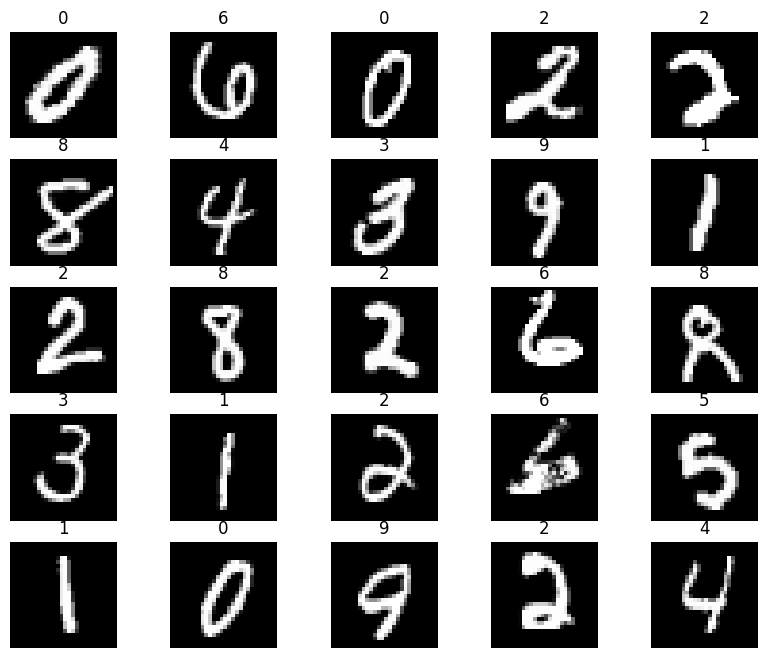

In [ ]:
figure = plt.figure(figsize=(10,8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7cce0f368460>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7cce0f368550>}

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x

In [ ]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [ ]:
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [ ]:

num_epochs = 2
def train(num_epochs, cnn, loaders):

    cnn.train()


    total_step = len(loaders['train'])
    for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(loaders['train']):
         b_x = Variable(images)
         b_y = Variable(labels)
         output = cnn(b_x)[0]
         loss = loss_func(output, b_y)
         optimizer.zero_grad()
         loss.backward()
         optimizer.step()
         if (i+1) % 100 == 0:
          print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
          .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

train(num_epochs, cnn, loaders)


Epoch [1/2], Step [100/600], Loss: 0.1103
Epoch [1/2], Step [200/600], Loss: 0.1043
Epoch [1/2], Step [300/600], Loss: 0.0633
Epoch [1/2], Step [400/600], Loss: 0.0466
Epoch [1/2], Step [500/600], Loss: 0.0441
Epoch [1/2], Step [600/600], Loss: 0.0393
Epoch [2/2], Step [100/600], Loss: 0.0116
Epoch [2/2], Step [200/600], Loss: 0.0258
Epoch [2/2], Step [300/600], Loss: 0.1152
Epoch [2/2], Step [400/600], Loss: 0.0154
Epoch [2/2], Step [500/600], Loss: 0.0589
Epoch [2/2], Step [600/600], Loss: 0.1203


In [ ]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

test()



Test Accuracy of the model on the 10000 test images: 0.99
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 0.96
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 0.95
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 1.00
Test Accuracy of the model on the 10000 test images: 0.99
Test Accuracy 

In [ ]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [ ]:
actual_number = lbls[:10].numpy()
actual_number

array([0, 7, 6, 3, 0, 3, 7, 3, 2, 3])

In [ ]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [0 7 5 3 0 3 7 3 2 3]
Actual number: [0 7 6 3 0 3 7 3 2 3]


In [ ]:
### saving the trained model
torch.save(cnn.state_dict(), 'model.pt')

torch.Size([28, 28])


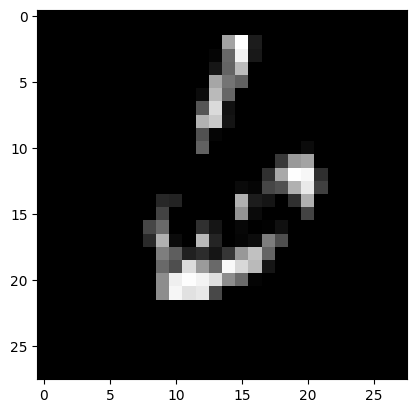

In [ ]:
## storing a sample image to the disk
sample_img = imgs[2][0]
print(sample_img.shape)
plt.imshow(sample_img, 'gray')
plt.imsave('sample_img.png', sample_img, cmap='gray')

In [ ]:



## initiating the model architecture
cnn = CNN()

## loading the model weights from training
cnn.load_state_dict( torch.load('model.pt') )

print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


(28, 28)
torch.Size([1, 1, 28, 28])
tensor(6)


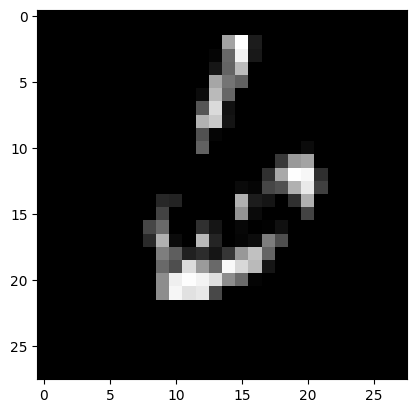

In [ ]:

## load a sample image
filename = 'sample_img.png'
img = Image.open(filename).convert('L')
print(img.size)
plt.imshow(img, 'gray')

## test the model with sample image

# first we need convert image shape from (28,28) to (1,1,28,28)
img = np.expand_dims(img, 0)
img = np.expand_dims(img, 0)
img = torch.Tensor(img.copy())
print(img.shape)

## giving img as input to the model
test_output, last_layer = cnn(img)

pred_y = torch.max(test_output, 1)[1].data.squeeze()

print(pred_y)



In [ ]:


## next steps todo
'''
# 1. use gradio python package to build web app to serve the model
'''

'\n# 1. use gradio python package to build web app to serve the model\n'

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.7 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

In [ ]:
import gradio as gr
import torchvision.models as models

In [ ]:
!ls /content/

data  model.pt	sample_data  sample_img.png


In [ ]:
model_path = "/content/model.pt"

# Load the model
model = CNN()
## loading the model weights from training
model.load_state_dict( torch.load(model_path) )


def predict_digit(image):
    image = image.convert('L')
    image = np.expand_dims(image, axis=0)
    image = np.expand_dims(image, axis=0)
    image = torch.Tensor(image.copy())
    print(image.shape)
    image = image / 255.0

    prediction, _ = model(image)
    predicted_digit = np.argmax(prediction.detach().numpy())
    return str(predicted_digit)


image = gr.Image(type='pil')
label = gr.Label(num_top_classes=3)
gr.Interface(fn=predict_digit, inputs=image, outputs=
             label, title="MNIST Digit Recognizer").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9c5864f158e24b7f84.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
